In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
ds=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/rr_monthly_0.25.1900-2015.nc')
rr=ds.rr
ds2=xr.open_dataset('/home/563/lx7831/ncfile/sst.mnmean.nc')
sst=ds2.sst
nino3_area=sst.sel(lat=slice(5,-5),lon=slice(210,270))
nino34_area=sst.sel(lat=slice(5,-5),lon=slice(190,240))
nino4_area=sst.sel(lat=slice(5,-5),lon=slice(160,210))
nino3_climate=nino3_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino34_climate=nino34_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino4_climate=nino4_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino3_anomaly=(nino3_area.groupby('time.month')-nino3_climate).mean(dim='lat').mean(dim='lon')
nino34_anomaly=(nino34_area.groupby('time.month')-nino34_climate).mean(dim='lat').mean(dim='lon')
nino4_anomaly=(nino4_area.groupby('time.month')-nino4_climate).mean(dim='lat').mean(dim='lon')
alpha=xr.where(nino3_anomaly*nino4_anomaly>0,0.4,0)
nct=nino3_anomaly-alpha*nino4_anomaly
nwp=nino4_anomaly-alpha*nino3_anomaly
nino3_rolling=nino3_anomaly.rolling(time=5).mean()
nino34_rolling=nino34_anomaly.rolling(time=5).mean()
nino4_rolling=nino4_anomaly.rolling(time=5).mean()
nct_rolling=nct.rolling(time=5).mean()
nwp_rolling=nwp.rolling(time=5).mean()
nino3_modern=nino3_rolling.sel(time=slice('1900','2015'))
nino34_modern=nino34_rolling.sel(time=slice('1900','2015'))
nino4_modern=nino4_rolling.sel(time=slice('1900','2015'))
nct_modern=nct_rolling.sel(time=slice('1900','2015'))
nwp_modern=nwp_rolling.sel(time=slice('1900','2015'))
import scipy
from scipy import signal
from scipy.stats.stats import pearsonr
def correlate_nino(data, nino):
    r, p = scipy.stats.pearsonr(data, nino)
    return r

In [2]:
nino3_spatial=np.apply_along_axis(correlate_nino, 0, rr, nino3_modern)
nino34_spatial=np.apply_along_axis(correlate_nino, 0, rr, nino34_modern)
nino4_spatial=np.apply_along_axis(correlate_nino, 0, rr, nino4_modern)
nct_spatial=np.apply_along_axis(correlate_nino, 0, rr, nct_modern)
nwp_spatial=np.apply_along_axis(correlate_nino, 0, rr, nwp_modern)
nino3_DJF=nino3_modern.groupby('time.season')['DJF']
nino34_DJF=nino34_modern.groupby('time.season')['DJF']
nino4_DJF=nino4_modern.groupby('time.season')['DJF']
nct_DJF=nct_modern.groupby('time.season')['DJF']
nwp_DJF=nwp_modern.groupby('time.season')['DJF']
nino3_SON=nino3_modern.groupby('time.season')['SON']
nino34_SON=nino34_modern.groupby('time.season')['SON']
nino4_SON=nino4_modern.groupby('time.season')['SON']
nct_SON=nct_modern.groupby('time.season')['SON']
nwp_SON=nwp_modern.groupby('time.season')['SON']
nino3_MAM=nino3_modern.groupby('time.season')['MAM']
nino34_MAM=nino34_modern.groupby('time.season')['MAM']
nino4_MAM=nino4_modern.groupby('time.season')['MAM']
nct_MAM=nct_modern.groupby('time.season')['MAM']
nwp_MAM=nwp_modern.groupby('time.season')['MAM']
rr_DJF=rr.groupby('time.season')['DJF']
rr_SON=rr.groupby('time.season')['SON']
rr_MAM=rr.groupby('time.season')['MAM']
nino3_SON_spatial=np.apply_along_axis(correlate_nino, 0, rr_SON, nino3_SON)
nino34_SON_spatial=np.apply_along_axis(correlate_nino, 0, rr_SON, nino34_SON)
nino4_SON_spatial=np.apply_along_axis(correlate_nino, 0, rr_SON, nino4_SON)
nct_SON_spatial=np.apply_along_axis(correlate_nino, 0, rr_SON, nct_SON)
nwp_SON_spatial=np.apply_along_axis(correlate_nino, 0, rr_SON, nwp_SON)
nino3_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nino3_DJF)
nino34_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nino34_DJF)
nino4_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nino4_DJF)
nct_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nct_DJF)
nwp_DJF_spatial=np.apply_along_axis(correlate_nino, 0, rr_DJF, nwp_DJF)
nino3_MAM_spatial=np.apply_along_axis(correlate_nino, 0, rr_MAM, nino3_MAM)
nino34_MAM_spatial=np.apply_along_axis(correlate_nino, 0, rr_MAM, nino34_MAM)
nino4_MAM_spatial=np.apply_along_axis(correlate_nino, 0, rr_MAM, nino4_MAM)
nct_MAM_spatial=np.apply_along_axis(correlate_nino, 0, rr_MAM, nct_MAM)
nwp_MAM_spatial=np.apply_along_axis(correlate_nino, 0, rr_MAM, nwp_MAM)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


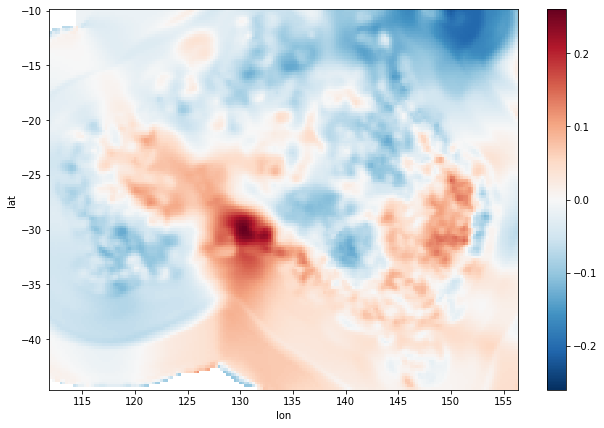

In [3]:
xr.DataArray(nct_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

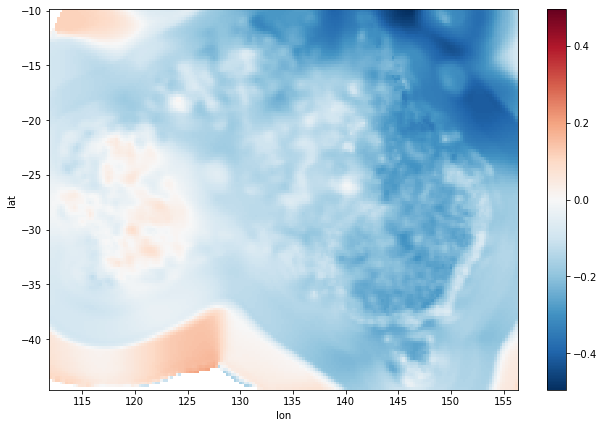

In [4]:
xr.DataArray(nino34_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)]).plot(size=7)

In [5]:
f = plt.figure()

<Figure size 432x288 with 0 Axes>

In [6]:
ax = f.add_subplot(121, projection=ccrs.PlateCarree())

NameError: name 'ccrs' is not defined

In [7]:
import cartopy.crs as ccrs

In [8]:
ax = f.add_subplot(121, projection=ccrs.PlateCarree())

In [9]:
nino3_spatial

array([[        nan,         nan,         nan, ...,  0.02793067,
         0.03389671,  0.04229839],
       [        nan,         nan,         nan, ...,  0.02658304,
         0.03004668,  0.04505658],
       [        nan,         nan,         nan, ...,  0.02568095,
         0.02801124,  0.03817307],
       ...,
       [        nan,         nan,         nan, ..., -0.16898386,
        -0.15535308, -0.13867637],
       [        nan,         nan,         nan, ..., -0.16957076,
        -0.15550129, -0.13830666],
       [        nan,         nan,         nan, ..., -0.16921521,
        -0.1546404 , -0.14379845]])

In [10]:
nwp_spatial_da=xr.DataArray(nwp_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nct_spatial_da=xr.DataArray(nct_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino3_spatial_da=xr.DataArray(nino3_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino34_spatial_da=xr.DataArray(nino34_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino4_spatial_da=xr.DataArray(nino4_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino3_SON_spatial_da=xr.DataArray(nino3_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino34_SON_spatial_da=xr.DataArray(nino34_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino4_SON_spatial_da=xr.DataArray(nino4_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nct_SON_spatial_da=xr.DataArray(nct_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nwp_SON_spatial_da=xr.DataArray(nwp_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino3_DJF_spatial_da=xr.DataArray(nino3_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino34_DJF_spatial_da=xr.DataArray(nino34_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino4_DJF_spatial_da=xr.DataArray(nino4_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nct_DJF_spatial_da=xr.DataArray(nct_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nwp_DJF_spatial_da=xr.DataArray(nwp_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino3_MAM_spatial_da=xr.DataArray(nino3_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino34_MAM_spatial_da=xr.DataArray(nino34_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nino4_MAM_spatial_da=xr.DataArray(nino4_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nct_MAM_spatial_da=xr.DataArray(nct_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
nwp_MAM_spatial_da=xr.DataArray(nwp_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])

In [11]:
nino4_spatial

array([[        nan,         nan,         nan, ...,  0.14674249,
         0.15169498,  0.1585376 ],
       [        nan,         nan,         nan, ...,  0.14519425,
         0.14838574,  0.1609124 ],
       [        nan,         nan,         nan, ...,  0.14398788,
         0.14632254,  0.15522524],
       ...,
       [        nan,         nan,         nan, ..., -0.24378257,
        -0.21906349, -0.19005057],
       [        nan,         nan,         nan, ..., -0.24268534,
        -0.21759521, -0.18811634],
       [        nan,         nan,         nan, ..., -0.23986093,
        -0.21441125, -0.19640308]])

In [12]:
nino4_spatial_da

<xarray.DataArray (lat: 139, lon: 178)>
array([[        nan,         nan,         nan, ...,  0.14674249,
         0.15169498,  0.1585376 ],
       [        nan,         nan,         nan, ...,  0.14519425,
         0.14838574,  0.1609124 ],
       [        nan,         nan,         nan, ...,  0.14398788,
         0.14632254,  0.15522524],
       ...,
       [        nan,         nan,         nan, ..., -0.24378257,
        -0.21906349, -0.19005057],
       [        nan,         nan,         nan, ..., -0.24268534,
        -0.21759521, -0.18811634],
       [        nan,         nan,         nan, ..., -0.23986093,
        -0.21441125, -0.19640308]])
Coordinates:
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2

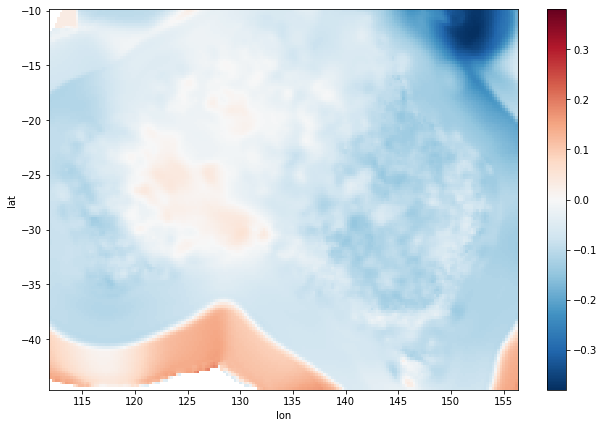

In [13]:
nino4_spatial_da.plot(size=7)

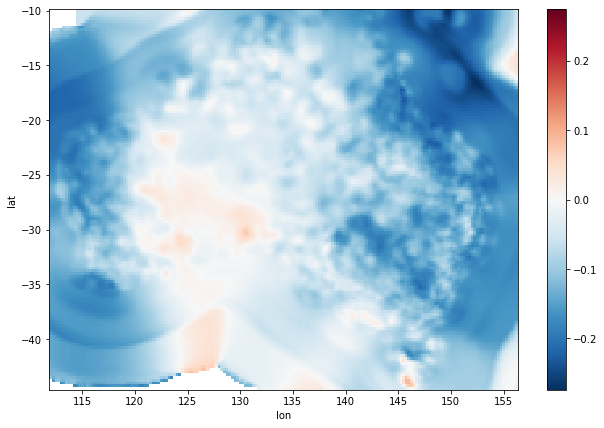

In [14]:
nino3_DJF_spatial_da.plot(size=7)

In [15]:
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')

In [16]:
ax.coastlines()

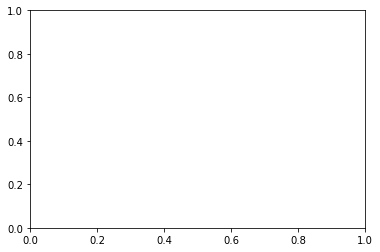

In [17]:
plt.colorbar(im, ax=ax)

In [18]:
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

In [19]:
f.set_figwidth(15)

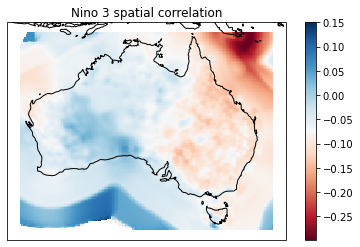

In [20]:
f

In [21]:
f.set_figwidth(30)

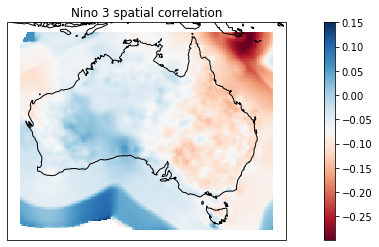

In [22]:
f

In [23]:
f = plt.figure(figsize=(7,5)
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('Nino 3 spatial correlation')

SyntaxError: invalid syntax (<ipython-input-23-ffd11fc31448>, line 2)

In [24]:
ax

<GeoAxesSubplot:title={'center':'Nino 3 spatial correlation'}>

In [25]:
ax = f.add_subplot(121, projection=ccrs.PlateCarree())

In [26]:
f = plt.figure(figsize=(7,5)
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('Nino 3 spatial correlation')

SyntaxError: invalid syntax (<ipython-input-26-ffd11fc31448>, line 2)

Text(0.5, 1.0, 'Nino 3 spatial correlation')

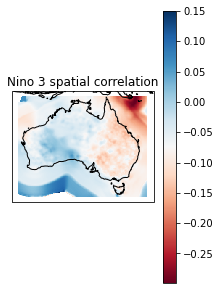

In [27]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

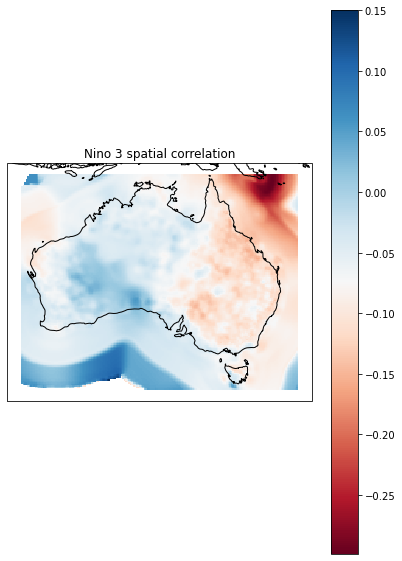

In [28]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

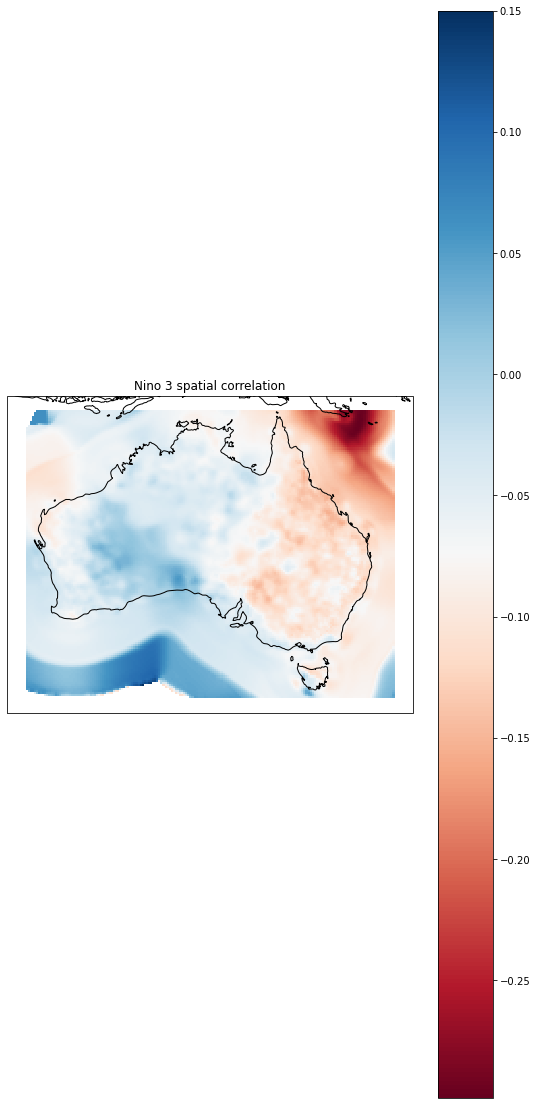

In [29]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

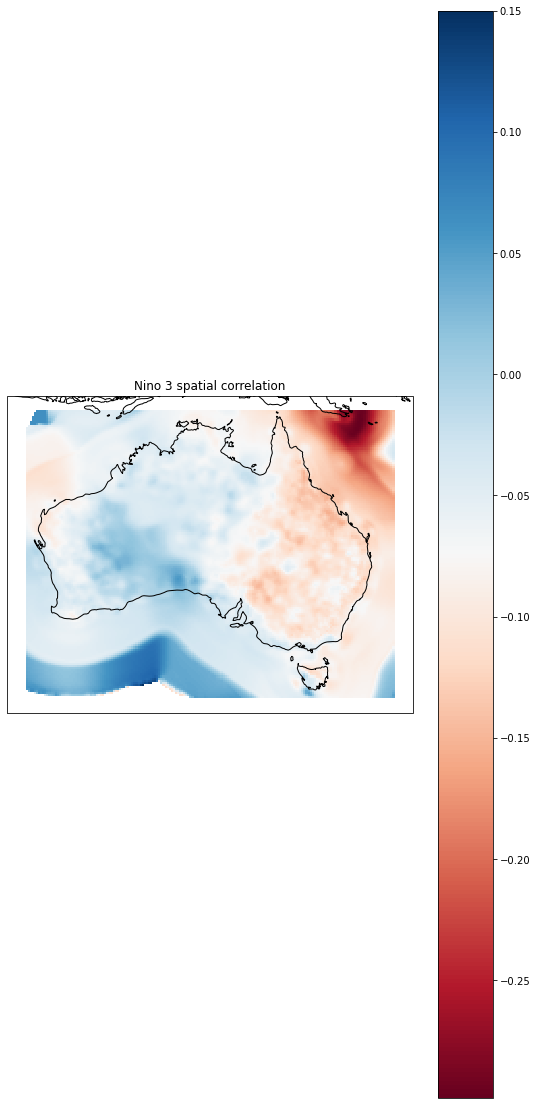

In [30]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im)
ax.set_title('Nino 3 spatial correlation')

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

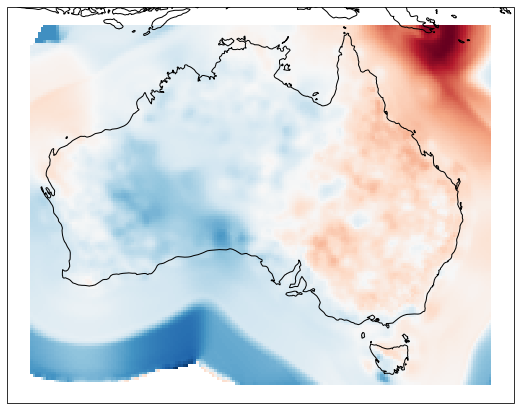

In [31]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar()
ax.set_title('Nino 3 spatial correlation')

AttributeError: 'GeoAxesSubplot' object has no attribute 'get_array'

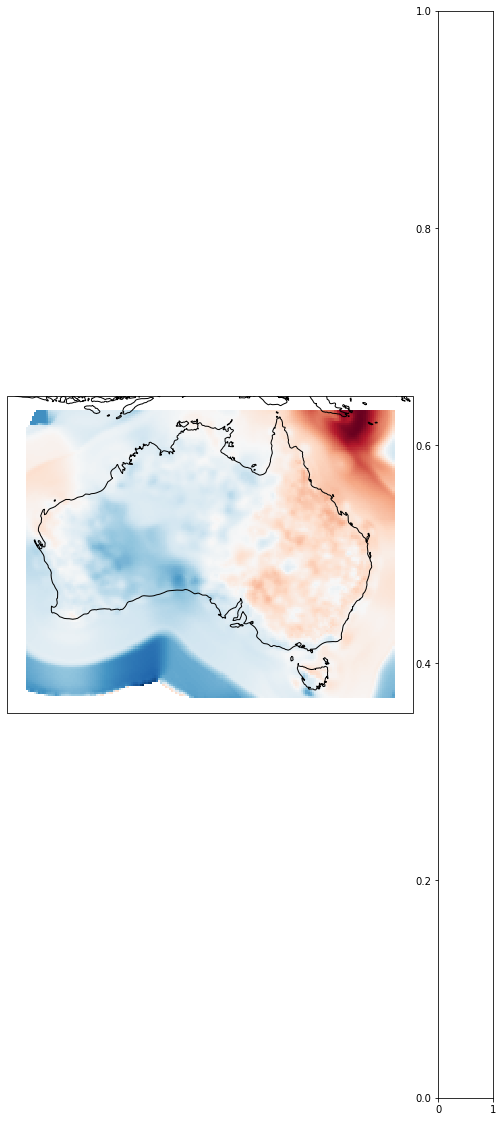

In [32]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(ax)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

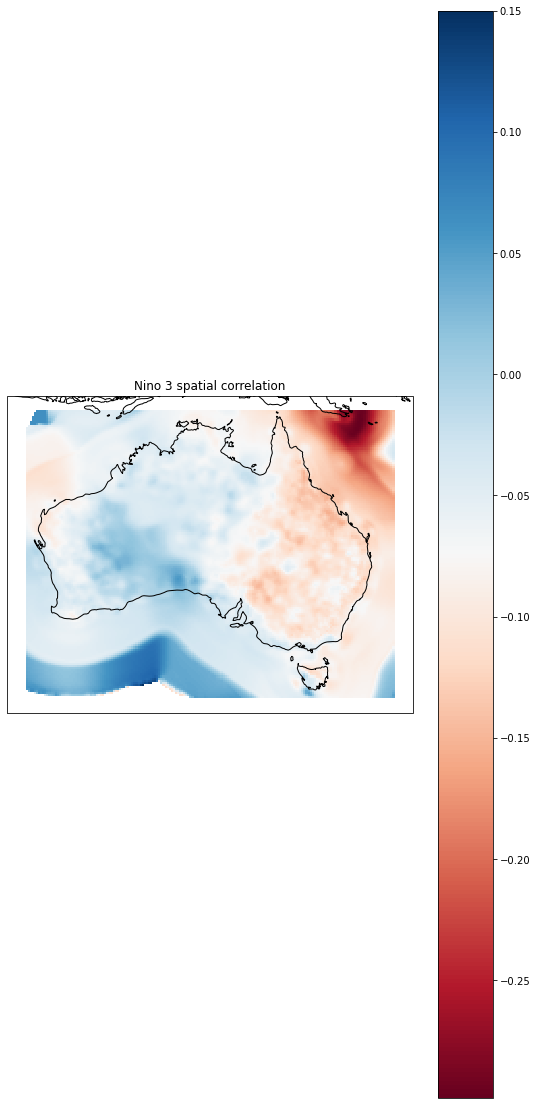

In [33]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

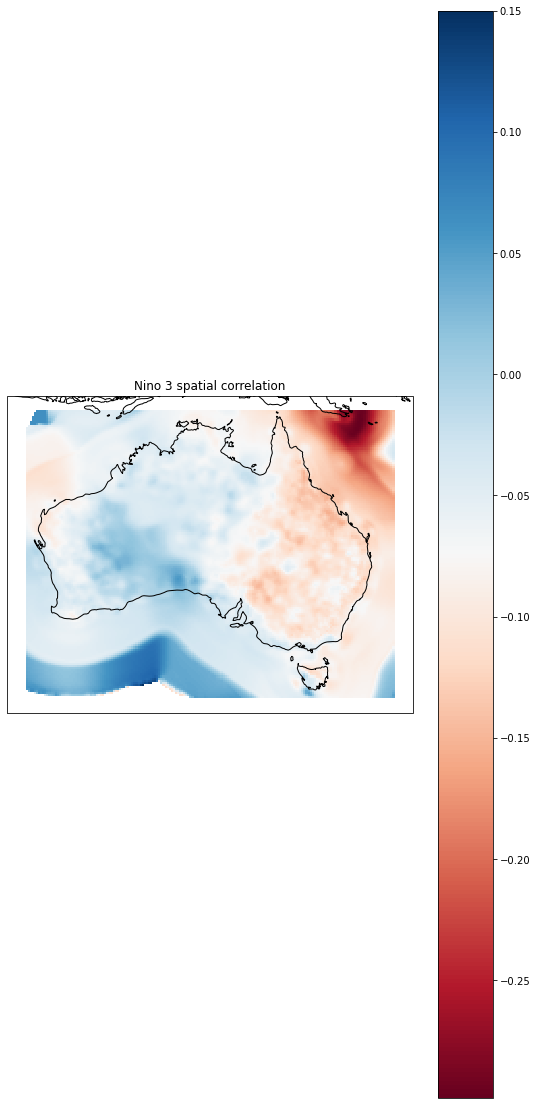

In [34]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=1)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

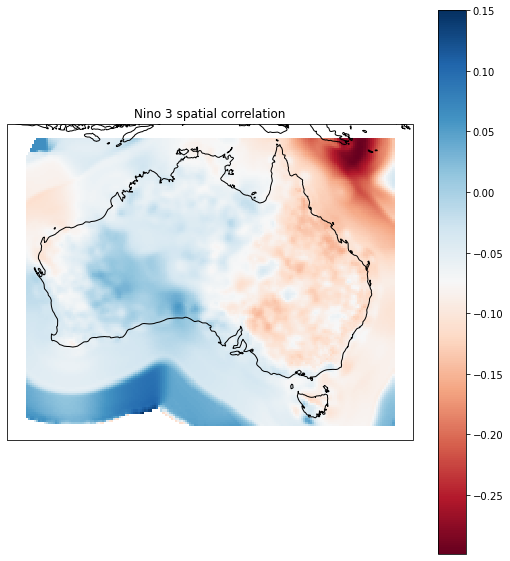

In [35]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.5)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

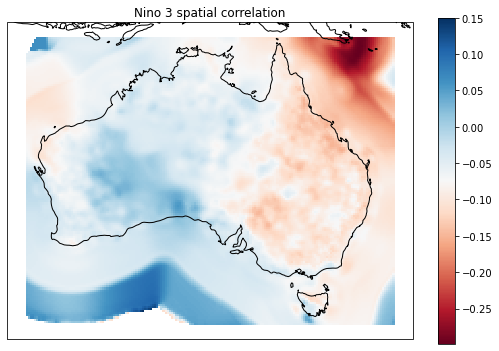

In [36]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

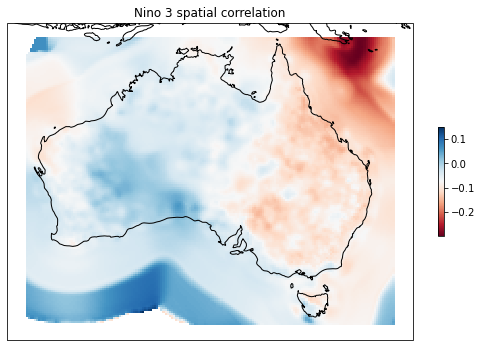

In [37]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.1)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

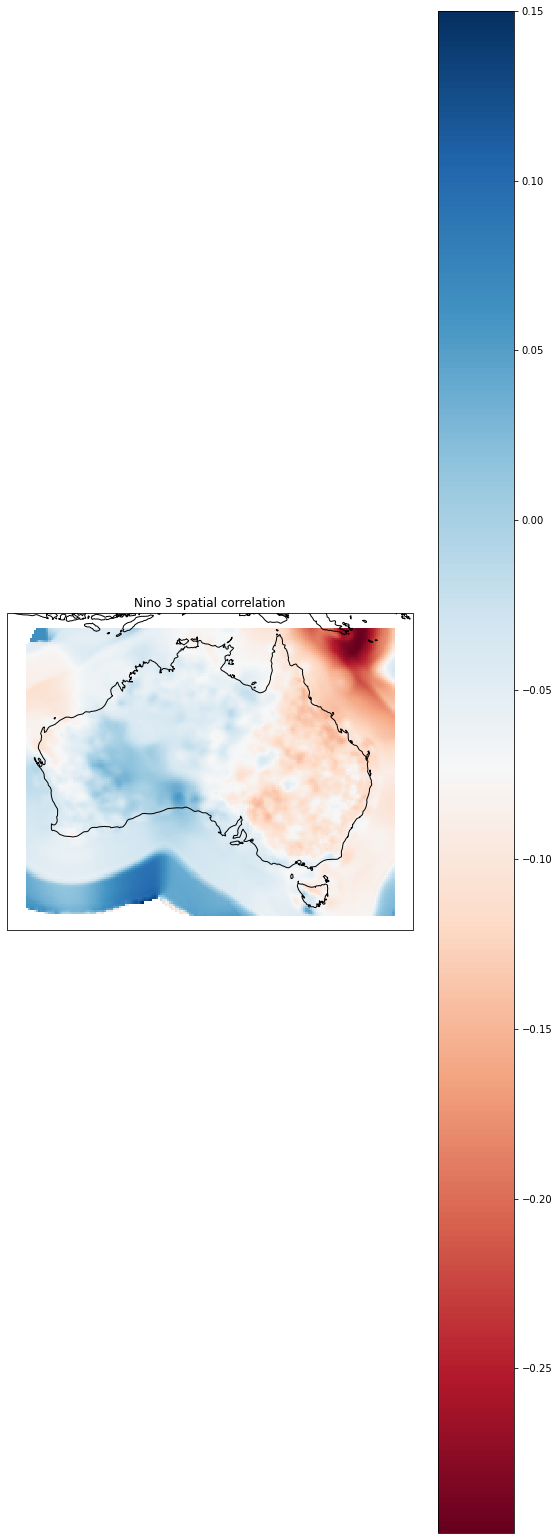

In [38]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=10)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

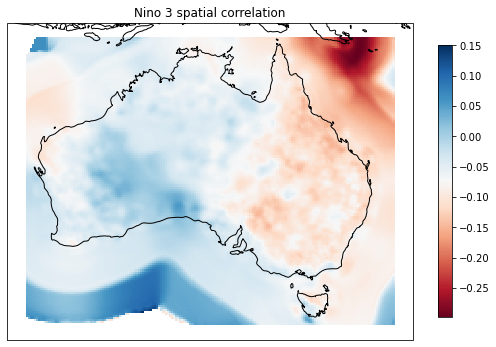

In [39]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.25)
ax.set_title('Nino 3 spatial correlation')

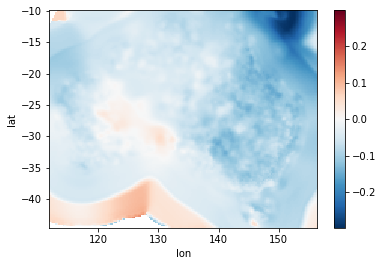

In [40]:
nino3_spatial_da.plot()

ValueError: 'BuRd' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

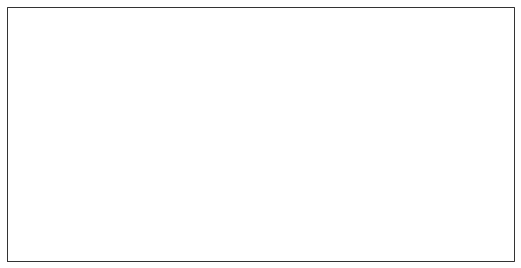

In [41]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='BuRd')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.25)
ax.set_title('Nino 3 spatial correlation')

In [42]:
ds3=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/bom_aust_mask_smooth.nc')

In [43]:
ds3

<xarray.Dataset>
Dimensions:   (lat: 139, lon: 178)
Coordinates:
  * lon       (lon) float32 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat       (lat) float32 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Data variables:
    landmask  (lat, lon) int32 ...
    lsmask    (lat, lon) float32 ...
Attributes:
    history:             input from /bm/gshare/bam/data/bma_vegdata/topog_glo...
    title:               interpolated land/sea mask from 0.1x0.1 degree topog...
    smoothing_distance:  0.5
    minimum_land:        -50.0

In [44]:
ds3.landmask

<xarray.DataArray 'landmask' (lat: 139, lon: 178)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
Coordinates:
  * lon      (lon) float32 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float32 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Attributes:
    long_name:  mask for surface: 0 = sea, 1 = land
    units:      -

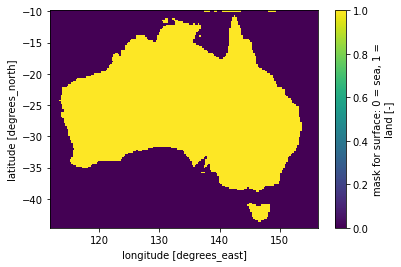

In [45]:
ds3.landmask.plot()

In [46]:
landmask=ds3.landmask

In [47]:
nino3_modern.where(landmask>0)

<xarray.DataArray 'sst' (time: 1392, lat: 139, lon: 178)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float32 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float32 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

(array([ 269088., 1917252., 3486932., 4182076., 2825424., 1872404.,
         739992.,  112120.,  134544.,   67272.]),
 array([-1.8483509 , -1.308915  , -0.76947916, -0.23004332,  0.3093925 ,
         0.8488284 ,  1.3882642 ,  1.9277    ,  2.467136  ,  3.0065718 ,
         3.5460076 ], dtype=float32),
 <BarContainer object of 10 artists>)

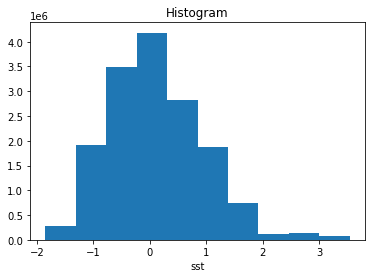

In [48]:
nino3_modern.where(landmask>0).plot()

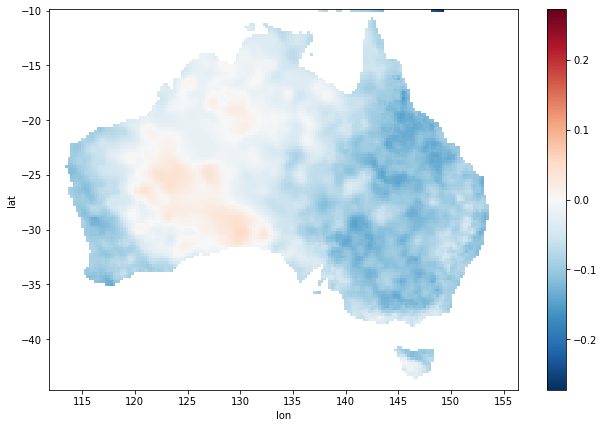

In [49]:
nino4_spatial_da.where(landmask>0).plot(size=7)

In [50]:
nwp_spatial_da=nwp_spatial_da.where(landmask>0)
nct_spatial_da=nct_spatial_da.where(landmask>0)
nino3_spatial_da=nino3_spatial_da.where(landmask>0)
nino34_spatial_da=nino34_spatial_da.where(landmask>0)
nino4_spatial_da=nino4_spatial_da.where(landmask>0)
nino3_SON_spatial_da=nino3_SON_spatial_da.where(landmask>0)
nino34_SON_spatial_da=nino34_SON_spatial_da.where(landmask>0)
nino4_SON_spatial_da=nino4_SON_spatial_da.where(landmask>0)
nct_SON_spatial_da=nct_SON_spatial_da.where(landmask>0)
nwp_SON_spatial_da=nwp_SON_spatial_da.where(landmask>0)
nino3_DJF_spatial_da=nino3_DJF_spatial_da.where(landmask>0)
nino34_DJF_spatial_da=nino34_DJF_spatial_da.where(landmask>0)
nino4_DJF_spatial_da=nino4_DJF_spatial_da.where(landmask>0)
nct_DJF_spatial_da=nct_DJF_spatial_da.where(landmask>0)
nwp_DJF_spatial_da=nwp_DJF_spatial_da.where(landmask>0)
nino3_MAM_spatial_da=nino3_MAM_spatial_da.where(landmask>0)
nino34_MAM_spatial_da=nino34_MAM_spatial_da.where(landmask>0)
nino4_MAM_spatial_da=nino4_MAM_spatial_da.where(landmask>0)
nct_MAM_spatial_da=nct_MAM_spatial_da.where(landmask>0)
nwp_MAM_spatial_da=nwp_MAM_spatial_da.where(landmask>0)

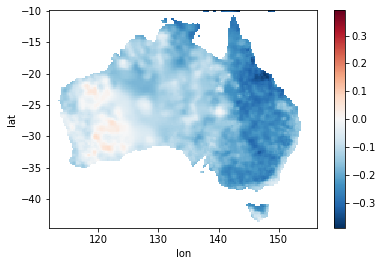

In [51]:
nino4_SON_spatial_da.plot()

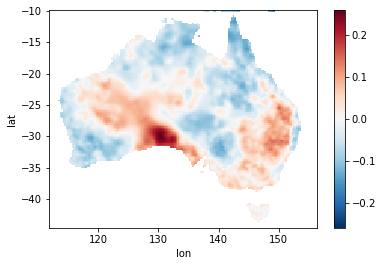

In [52]:
nct_MAM_spatial_da.plot()

Text(0.5, 1.0, 'Nino 3 spatial correlation')

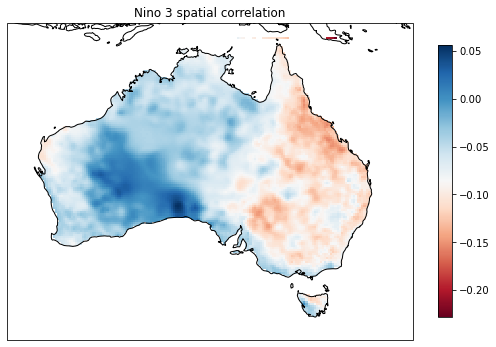

In [53]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.25)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

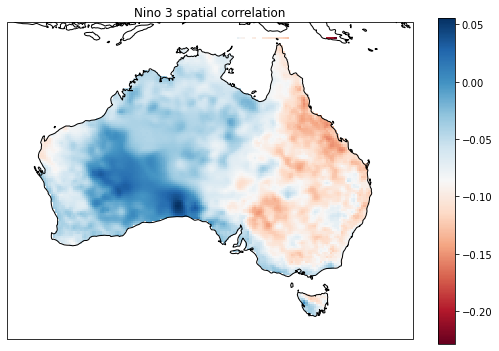

In [54]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

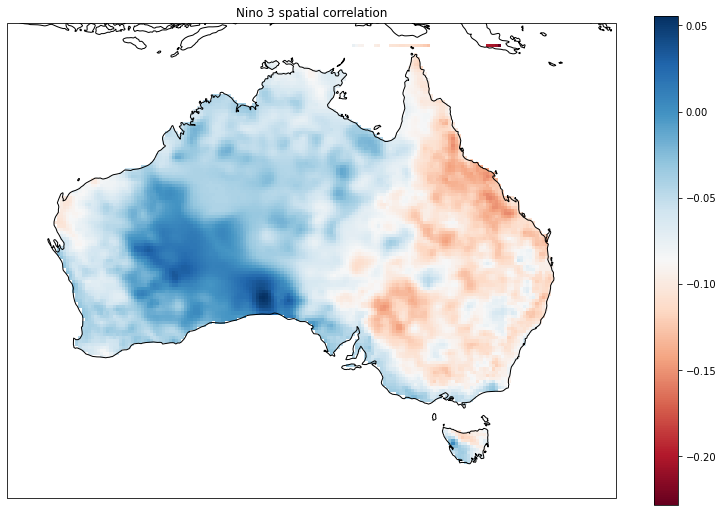

In [55]:
f = plt.figure(figsize=(30,30))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

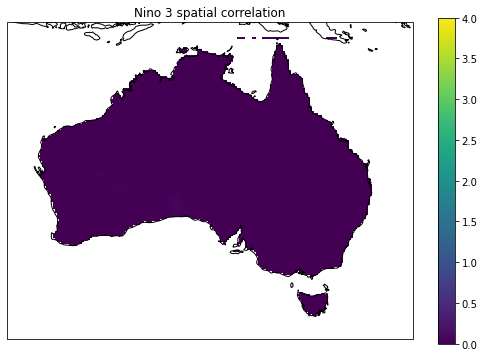

In [56]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino34_spatial_da.lon, nino34_spatial_da.lat, nino34_spatial_da, transform=ccrs.PlateCarree())
ax.coastlines()
im.set_clim(0, 4)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

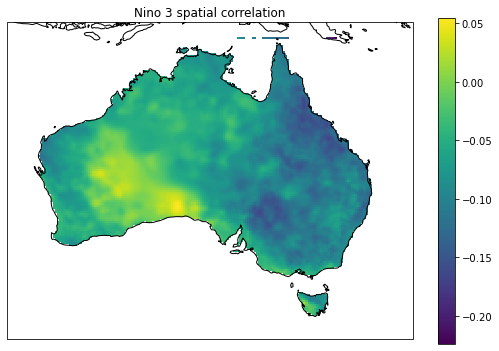

In [57]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino34_spatial_da.lon, nino34_spatial_da.lat, nino34_spatial_da, transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

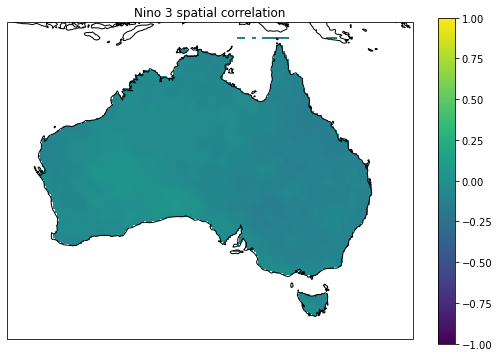

In [58]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino34_spatial_da.lon, nino34_spatial_da.lat, nino34_spatial_da, transform=ccrs.PlateCarree())
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

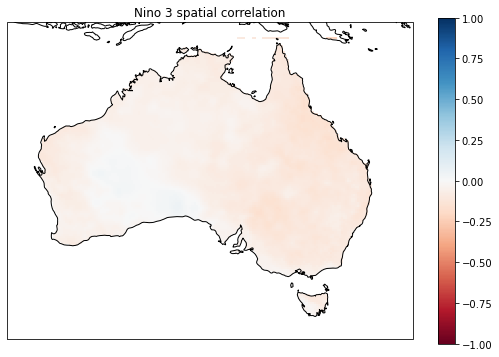

In [59]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino34_spatial_da.lon, nino34_spatial_da.lat, nino34_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

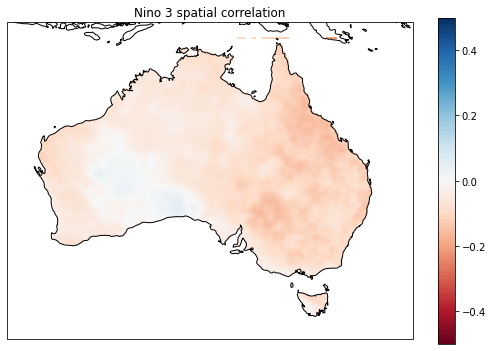

In [60]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino34_spatial_da.lon, nino34_spatial_da.lat, nino34_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation')

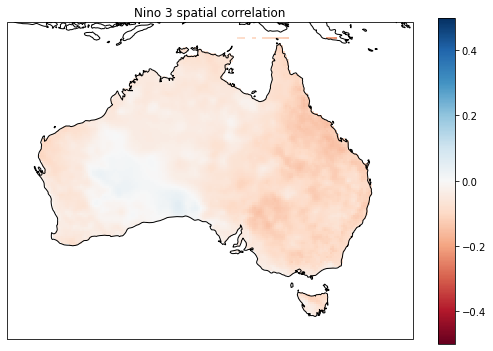

In [61]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_spatial_da.lon, nino3_spatial_da.lat, nino3_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation')

Text(0.5, 1.0, 'Nino 3.4 spatial correlation')

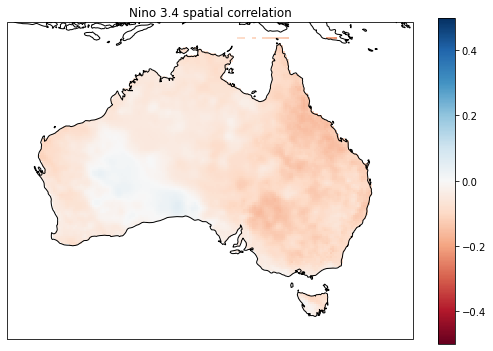

In [62]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino34_spatial_da.lon, nino34_spatial_da.lat, nino34_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3.4 spatial correlation')

Text(0.5, 1.0, 'Nino 4 spatial correlation')

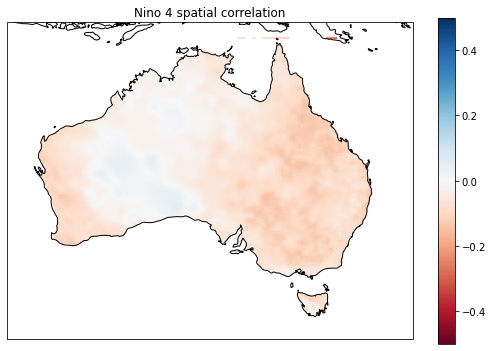

In [63]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino4_spatial_da.lon, nino4_spatial_da.lat, nino4_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 4 spatial correlation')

Text(0.5, 1.0, 'Nino_CT spatial correlation')

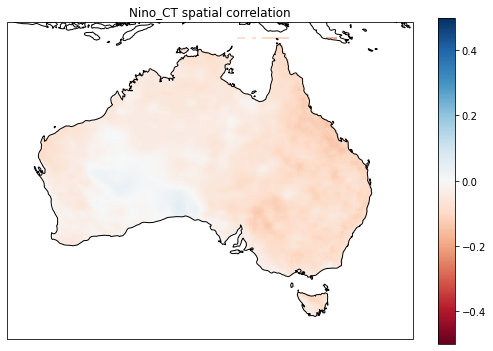

In [64]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nct_spatial_da.lon, nct_spatial_da.lat, nct_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino_CT spatial correlation')

Text(0.5, 1.0, 'Nino_WP spatial correlation')

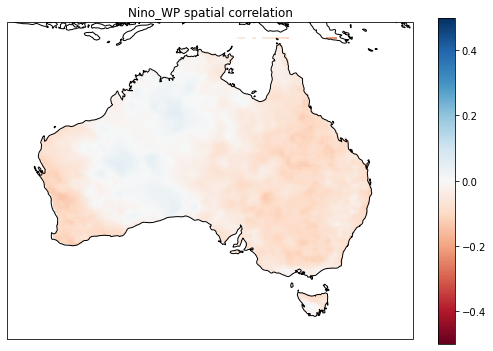

In [65]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nwp_spatial_da.lon, nwp_spatial_da.lat, nwp_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino_WP spatial correlation')

Text(0.5, 1.0, 'Nino 3 spatial correlation SON')

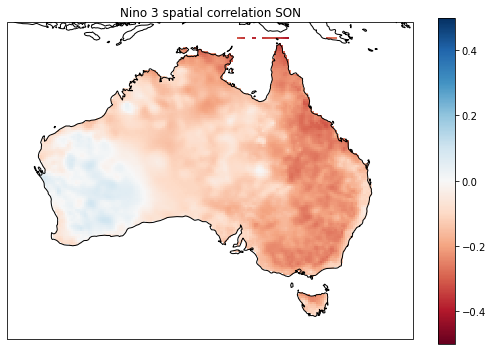

In [66]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_SON_spatial_da.lon, nino3_SON_spatial_da.lat, nino3_SON_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation SON')

Text(0.5, 1.0, 'Nino 3.4 spatial correlation SON')

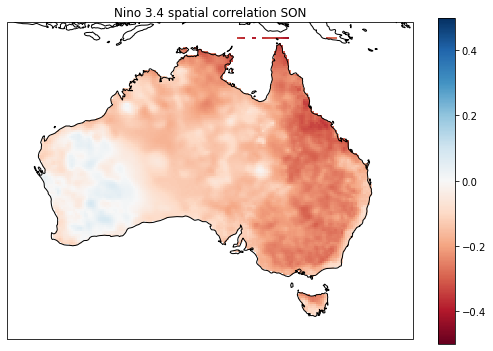

In [67]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino34_SON_spatial_da.lon, nino34_SON_spatial_da.lat, nino34_SON_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3.4 spatial correlation SON')

Text(0.5, 1.0, 'Nino 4 spatial correlation SON')

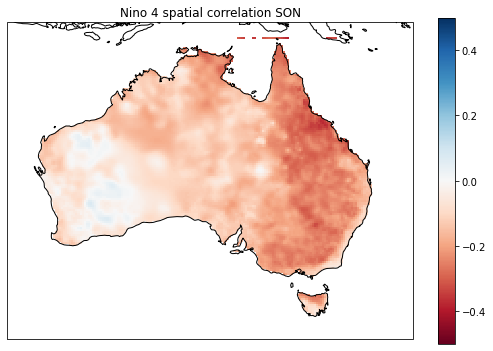

In [68]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino4_SON_spatial_da.lon, nino4_SON_spatial_da.lat, nino4_SON_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 4 spatial correlation SON')

Text(0.5, 1.0, 'Nino_CT spatial correlation SON')

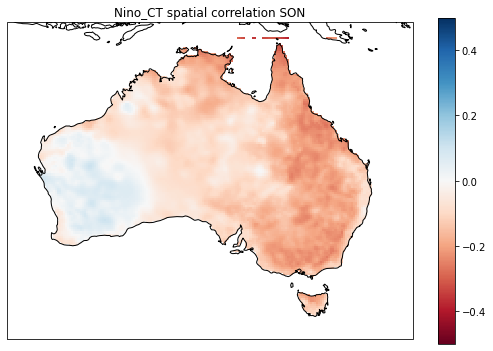

In [69]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nct_SON_spatial_da.lon, nct_SON_spatial_da.lat, nct_SON_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino_CT spatial correlation SON')

Text(0.5, 1.0, 'Nino_WP spatial correlation SON')

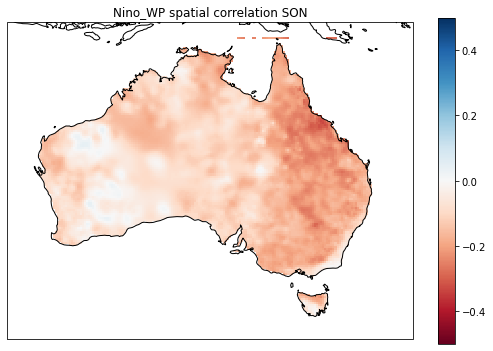

In [70]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nwp_SON_spatial_da.lon, nwp_SON_spatial_da.lat, nwp_SON_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino_WP spatial correlation SON')

Text(0.5, 1.0, 'Nino 3 spatial correlation DJF')

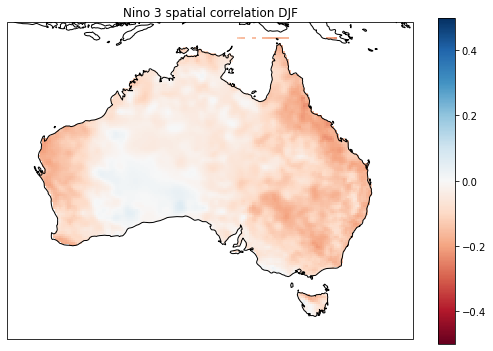

In [71]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_DJF_spatial_da.lon, nino3_DJF_spatial_da.lat, nino3_DJF_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation DJF')

Text(0.5, 1.0, 'Nino 3.4 spatial correlation DJF')

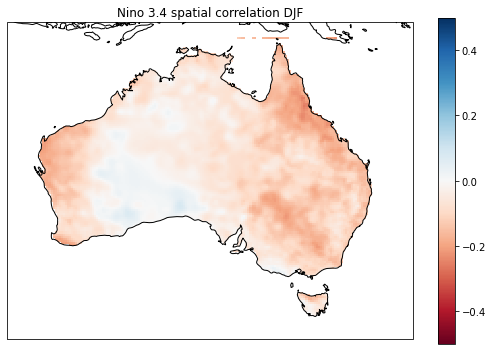

In [72]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino34_DJF_spatial_da.lon, nino34_DJF_spatial_da.lat, nino34_DJF_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3.4 spatial correlation DJF')

Text(0.5, 1.0, 'Nino 4 spatial correlation DJF')

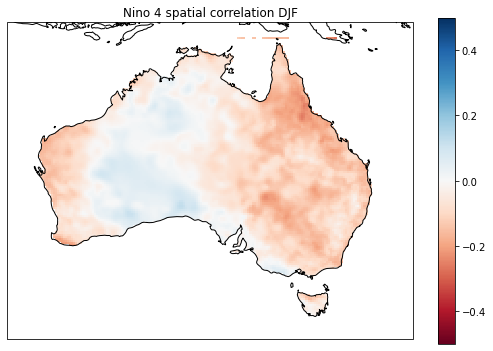

In [73]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino4_DJF_spatial_da.lon, nino4_DJF_spatial_da.lat, nino4_DJF_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 4 spatial correlation DJF')

Text(0.5, 1.0, 'Nino_CT spatial correlation DJF')

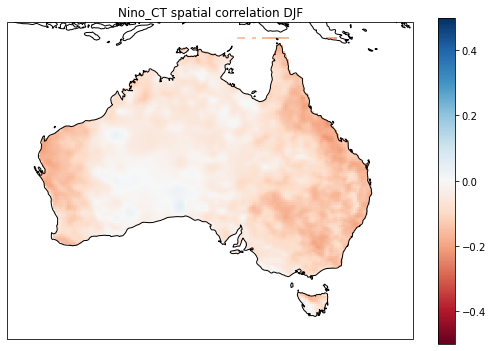

In [74]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nct_DJF_spatial_da.lon, nct_DJF_spatial_da.lat, nct_DJF_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino_CT spatial correlation DJF')

Text(0.5, 1.0, 'Nino_WP spatial correlation DJF')

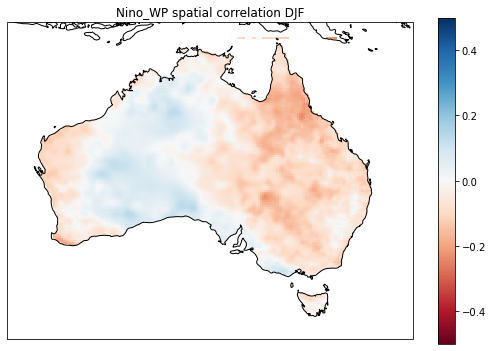

In [75]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nwp_DJF_spatial_da.lon, nwp_DJF_spatial_da.lat, nwp_DJF_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino_WP spatial correlation DJF')

Text(0.5, 1.0, 'Nino 3 spatial correlation MAM')

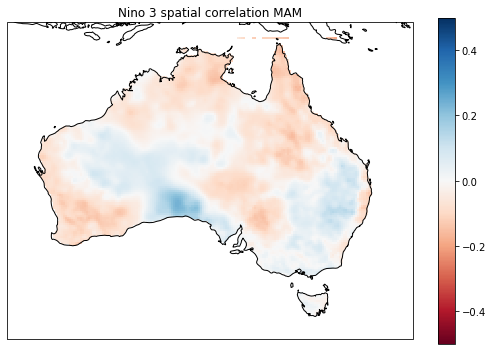

In [76]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino3_MAM_spatial_da.lon, nino3_MAM_spatial_da.lat, nino3_MAM_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3 spatial correlation MAM')

Text(0.5, 1.0, 'Nino 3.4 spatial correlation MAM')

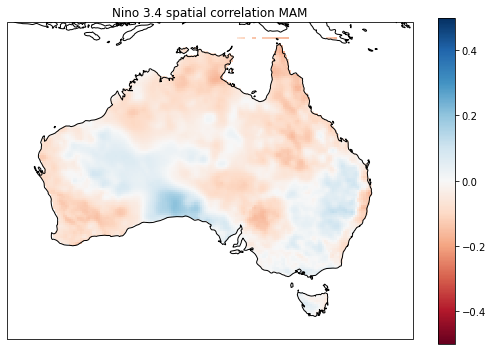

In [77]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino34_MAM_spatial_da.lon, nino34_MAM_spatial_da.lat, nino34_MAM_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 3.4 spatial correlation MAM')

Text(0.5, 1.0, 'Nino 4 spatial correlation MAM')

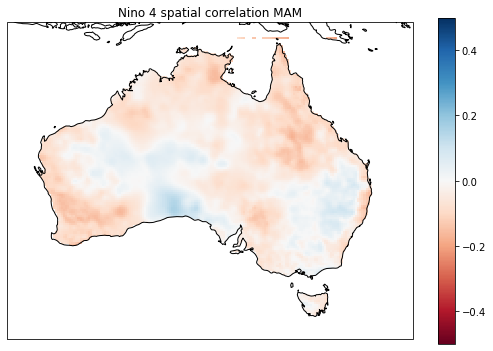

In [78]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino4_MAM_spatial_da.lon, nino4_MAM_spatial_da.lat, nino4_MAM_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino 4 spatial correlation MAM')

Text(0.5, 1.0, 'Nino_CT spatial correlation MAM')

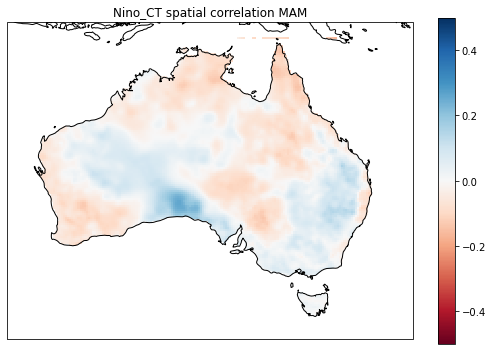

In [79]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nct_MAM_spatial_da.lon, nct_MAM_spatial_da.lat, nct_MAM_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino_CT spatial correlation MAM')

Text(0.5, 1.0, 'Nino_WP spatial correlation MAM')

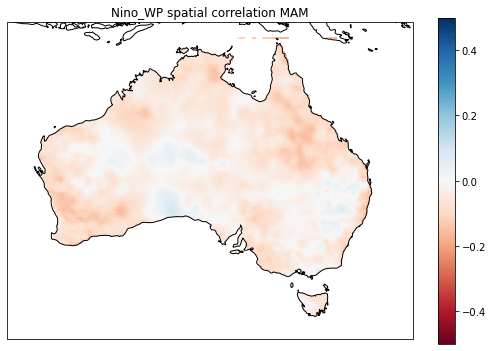

In [80]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nwp_MAM_spatial_da.lon, nwp_MAM_spatial_da.lat, nwp_MAM_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('Nino_WP spatial correlation MAM')